In [1]:
# Copyright 2018-2020 Erasmus+ ICCT Project Consortium
#
# Redistribution and use in source and binary forms, with or without modification, 
# are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, 
# this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, 
# this list of conditions and the following disclaimer in the documentation and/or 
# other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors
# may be used to endorse or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, 
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, 
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, 
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE 
# POSSIBILITY OF SUCH DAMAGE.

In [2]:
from IPython.display import HTML

# # Cell visibility - COMPLETE:
# tag = HTML('''<style> div.input {display:none;} </style>''')

#Cell visibility - TOGGLE:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p style="text-align:right">
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.</p>''')

display(tag)

In [3]:
%matplotlib notebook
import control as control
import ipywidgets as widgets
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## Poles, zeros and system response

In system analyis and design it is important to understand that when the system response is being analyzed based on the transfer function, both transfer function and the input signal (its Laplace transform to be more exact) are important. 

For example, a response $Y(s)=\frac{1}{s(s+1)(s+2)}$ can be obtained if a system with a transfer function $P_1(s)=\frac{1}{(s+1)(s+2)}$ is being acted upon with an input signal $X_1(s)=\frac{1}{s}$ (unit transfer function), or if a system with a transfer function $P_2(s)=\frac{1}{s(s+1)}$ is being acted upon with an input signal $X_2(s)=\frac{1}{s+2}$.

This property is demonstrated in this example. Also the position of zeros and poles and their influence on the system response can be observed.

### How to use this notebook?

- Toggle between four different systems (see image below).
- Use the sliders to change the values of the coefficients $a$, $b$, $c$ and $d$ to define the input function and the transfer function of the system. 

---

<table>
    <tr>
        <th style="text-align:center">System 1</th>
        <th style="text-align:center">System 2</th>
        <th style="text-align:center">System 3</th>
        <th style="text-align:center">System 4</th>
    </tr>
    <tr>
        <td><img src='img\pole-zero-system1.png'></td>
        <td><img src='img\pole-zero-system2.png'></td>
        <td><img src='img\pole-zero-system3.png'></td>
        <td><img src='img\pole-zero-system4.png'></td>        
    </tr>
    <tr>
    </tr>    
</table>

<IPython.core.display.Javascript object>


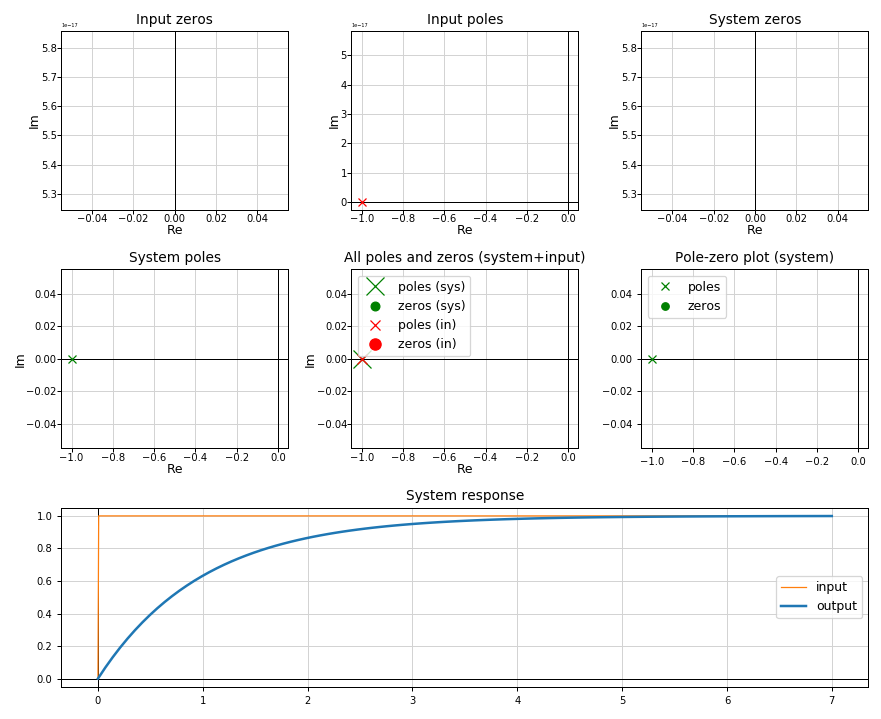

Output()

In [4]:
# Create figure and define the six subplots (2x3)

fig1 = plt.figure()
gs=GridSpec(3,3,figure=fig1)

f1_1=fig1.add_subplot(gs[0,0])
f1_2=fig1.add_subplot(gs[0,1])
f1_3=fig1.add_subplot(gs[0,2])
f1_4=fig1.add_subplot(gs[1,0])
f1_5=fig1.add_subplot(gs[1,1])
f1_6=fig1.add_subplot(gs[1,2])
f1_7=fig1.add_subplot(gs[2,:])

# fig1, ((f1_1, f1_2, f1_3), (f1_4, f1_5, f1_6), f1_7) = plt.subplots(3,3,num=' ')
fig1.set_size_inches((9.8, 8))
fig1.set_tight_layout(True)

offset_text1 = f1_1.yaxis.get_offset_text()
offset_text1.set_size(4)
offset_text2 = f1_2.yaxis.get_offset_text()
offset_text2.set_size(4)
offset_text3 = f1_3.yaxis.get_offset_text()
offset_text3.set_size(4)
offset_text3x = f1_3.xaxis.get_offset_text()
offset_text3x.set_size(4)
offset_text4 = f1_4.yaxis.get_offset_text()
offset_text4.set_size(4)
offset_text5 = f1_5.yaxis.get_offset_text()
offset_text5.set_size(4)
offset_text6 = f1_6.yaxis.get_offset_text()
offset_text6.set_size(4)
offset_text6 = f1_7.yaxis.get_offset_text()
offset_text6.set_size(4)

# Initialize the subplots
f1_line1, = f1_1.plot([], [])
f1_line2, = f1_2.plot([],[])
f1_line3, = f1_3.plot([], [])
f1_line4, = f1_4.plot([], [])  
f1_line5a, = f1_5.plot([], [])
f1_line5b, = f1_5.plot([], [])
f1_line5c, = f1_5.plot([], [])
f1_line5d, = f1_5.plot([], [])
f1_line6a, = f1_6.plot([], [])
f1_line6b, = f1_6.plot([], [])
f1_line7a, = f1_7.plot([], [])
f1_line7b, = f1_7.plot([], [])

# Titles, labels, ticks, lines
f1_1.set_title('Input zeros', fontsize=11)
f1_1.set_xlabel('Re', labelpad=0, fontsize=10)
f1_1.set_ylabel('Im', labelpad=0, fontsize=10)
f1_1.tick_params(axis='both', which='both', pad=0, labelsize=8)
f1_1.axes.axhline(y=0,lw=0.8,color='k')
f1_1.axes.axvline(x=0,lw=0.8,color='k')

f1_2.set_title('Input poles', fontsize=11)
f1_2.set_xlabel('Re', labelpad=0, fontsize=10)
f1_2.set_ylabel('Im', labelpad=0, fontsize=10)
f1_2.tick_params(axis='both', which='both', pad=0, labelsize=8)
f1_2.axes.axhline(y=0,lw=0.8,color='k')
f1_2.axes.axvline(x=0,lw=0.8,color='k')

f1_3.set_title('System zeros', fontsize=11)
f1_3.set_xlabel('Re', labelpad=0, fontsize=10)
f1_3.set_ylabel('Im', labelpad=0, fontsize=10)
f1_3.tick_params(axis='both', which='both', pad=0, labelsize=8)
f1_3.axes.axhline(y=0,lw=0.8,color='k')
f1_3.axes.axvline(x=0,lw=0.8,color='k')

f1_4.set_title('System poles', fontsize=11)
f1_4.set_xlabel('Re', labelpad=0, fontsize=10)
f1_4.set_ylabel('Im', labelpad=0, fontsize=10)
f1_4.tick_params(axis='both', which='both', pad=0, labelsize=8)
f1_4.axes.axhline(y=0,lw=0.8,color='k')
f1_4.axes.axvline(x=0,lw=0.8,color='k')

f1_5.set_title('All poles and zeros (system+input)', fontsize=11)
f1_5.set_xlabel('Re', labelpad=0, fontsize=10)
f1_5.set_ylabel('Im', labelpad=0, fontsize=10)
f1_5.tick_params(axis='both', which='both', pad=0, labelsize=8)
f1_5.axes.axhline(y=0,lw=0.8,color='k')
f1_5.axes.axvline(x=0,lw=0.8,color='k')

f1_6.set_title('Pole-zero plot (system)', fontsize=11)
f1_6.set_xlabel('', labelpad=0, fontsize=10)
f1_6.set_ylabel('', labelpad=0, fontsize=10)
f1_6.tick_params(axis='both', which='both', labelsize=8)
f1_6.axes.axhline(y=0,lw=0.8,color='k')
f1_6.axes.axvline(x=0,lw=0.8,color='k')

f1_7.set_title('System response', fontsize=11)
f1_7.set_xlabel('', labelpad=0, fontsize=10)
f1_7.set_ylabel('', labelpad=0, fontsize=10)
f1_7.tick_params(axis='both', which='both', labelsize=8)
f1_7.axes.axhline(y=0,lw=0.8,color='k')
f1_7.axes.axvline(x=0,lw=0.8,color='k')

# # Define the appearance of the grid
f1_1.grid(which='both', axis='both', color='lightgray')
f1_2.grid(which='both', axis='both', color='lightgray')
f1_3.grid(which='both', axis='both', color='lightgray')
f1_4.grid(which='both', axis='both', color='lightgray')
f1_5.grid(which='both', axis='both', color='lightgray')
f1_6.grid(which='both', axis='both', color='lightgray')
f1_7.grid(which='both', axis='both', color='lightgray')

# Buttons for toggling between different models
style = {'description_width': 'initial'} # style for description length

modelSelect = widgets.ToggleButtons(
    options=[('System 1',0),('System 2',1),('System 3',2),('System 4',3)],
    description='Select system: ', style=style) # define toggle buttons
    
def build_model(a,b,c,d,model):

    if model==0:  
        zeros_in=np.roots([1])
        poles_in=np.roots([1,a])
        zeros_sys=np.roots([1])
        poles_sys=np.roots([1,b])
        W_sys=control.tf(np.array([1]),np.array([1,b]))
        tout, yout = control.step_response(W_sys)
    elif model==1:
        zeros_in=np.roots([1])
        poles_in=np.roots([1,a])
        zeros_sys=np.roots([1,b])
        poles_sys=np.roots([1,c])
        W_sys=control.tf(np.array([1,b]),np.array([1,c]))
        tout, yout = control.step_response(W_sys)
    elif model==2:
        zeros_in=np.roots([1])
        poles_in=np.roots([1,a])
        zeros_sys=np.roots([1,b])
        poles_sys=np.roots([1,c,d])
        W_sys=control.tf(np.array([1,b]),np.array([1,c,d]))
        tout, yout = control.step_response(W_sys)
    elif model==3:
        zeros_in=np.roots([1,c])
        poles_in=np.roots([1,2*a,a^2+b^2])
        zeros_sys=np.roots([1])
        poles_sys=np.roots([1,d])   
        W_sys=control.tf(np.array([1,c]),np.array([1,d]))
        tout, yout = control.step_response(W_sys)
    
    global f1_line1, f1_line2, f1_line3, f1_line4, f1_line5a, f1_line5b, f1_line5c, f1_line5d, f1_line6a, f1_line6b, f1_line7a, f1_line7b
    
    f1_1.lines.remove(f1_line1)
    f1_2.lines.remove(f1_line2)
    f1_3.lines.remove(f1_line3)
    f1_4.lines.remove(f1_line4)
    f1_5.lines.remove(f1_line5a), f1_5.lines.remove(f1_line5b), f1_5.lines.remove(f1_line5c), f1_5.lines.remove(f1_line5d) 
    f1_6.lines.remove(f1_line6a), f1_6.lines.remove(f1_line6b)
    f1_7.lines.remove(f1_line7a), f1_7.lines.remove(f1_line7b)    
    
    if zeros_in.size>0:
        f1_line1, = f1_1.plot(np.real(zeros_in),np.imag(zeros_in),'og')
    else:
        f1_line1, = f1_1.plot([],[])    
    f1_line2, = f1_2.plot(np.real(poles_in),np.imag(poles_in),'xr')
    if zeros_sys.size>0:
        f1_line3, = f1_3.plot(np.real(zeros_sys),np.imag(zeros_sys),'og')
    else: 
        f1_line3, = f1_3.plot([],[])
    f1_line4, = f1_4.plot(np.real(poles_sys),np.imag(poles_sys),'xg')
    f1_line5a, = f1_5.plot(np.real(poles_sys),np.imag(poles_sys),'xg',label='poles (sys)',markersize=15)
    f1_line5b, = f1_5.plot(np.real(zeros_sys),np.imag(zeros_sys),'og',label='zeros (sys)',markersize=7)
    f1_line5c, = f1_5.plot(np.real(poles_in),np.imag(poles_in),'xr',label='poles (in)',markersize=8)
    f1_line5d, = f1_5.plot(np.real(zeros_in),np.imag(zeros_in),'or',label='zeros (in)',markersize=9)
    f1_5.legend()
    f1_line6a, = f1_6.plot(np.real(poles_sys),np.imag(poles_sys),'xg',label='poles')
    f1_line6b, = f1_6.plot(np.real(zeros_sys),np.imag(zeros_sys),'og',label='zeros')
    f1_6.legend()
    tstep=np.linspace(0,tout[-1],1000)
    u = np.ones_like(tstep)
    u[0]=0
    f1_line7b, = f1_7.plot(tstep,u,color='C1',label='input',linewidth=1)
    f1_line7a, = f1_7.plot(tout,yout,color='C0',label='output',linewidth=2)
    f1_7.legend()
       
    f1_1.relim(), f1_2.relim(), f1_3.relim(), f1_4.relim(), f1_5.relim(), f1_6.relim(), f1_7.relim()
    f1_1.autoscale_view(), f1_2.autoscale_view(), f1_3.autoscale_view(), f1_4.autoscale_view(), f1_5.autoscale_view(), f1_6.autoscale_view(), f1_7.autoscale_view()
    
    f1_1.ticklabel_format(axis='both',useOffset=False)
def update_sliders(model):
    
    global a_slider, b_slider, c_slider, d_slider
    
    aval = [1, 1, 1, 1]
    bval = [1, 1, 1, 1]
    cval = [1, 1, 1, 1]
    dval = [1, 1, 1, 1]
    
    a_slider.value = aval[model]
    b_slider.value = bval[model]
    c_slider.value = cval[model]
    d_slider.value = dval[model]    
    
def create_sliders(model):
    
    global a_slider, b_slider, c_slider, d_slider
    
    a_slider = widgets.IntSlider(value=1,min=-10, max=10,description='a: ',
                                 continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
    b_slider = widgets.IntSlider(value=1,min=-10, max=10,description='b: ',
                                 continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
    
    if model==0:
        c_slider = widgets.IntSlider(value=1,min=-10, max=10,description='c: ',
                                 disabled=True, continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
        d_slider = widgets.IntSlider(value=1,min=-10, max=10,description='d: ',
                                 disabled=True, continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
    elif model==1:
        c_slider = widgets.IntSlider(value=1,min=-10, max=10,description='c: ',
                                 continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
        d_slider = widgets.IntSlider(value=1,min=-10, max=10,description='d: ',
                                 disabled=True, continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
    else:
        c_slider = widgets.IntSlider(value=1,min=-10, max=10,description='c: ',
                                 continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
        d_slider = widgets.IntSlider(value=1,min=-10, max=10,description='d: ',
                                 continuous_update=False,layout=widgets.Layout(width='auto',flex='5 5 auto'))
        
    input_data=widgets.interactive_output(build_model, {'a':a_slider, 'b':b_slider, 'c':c_slider, 'd':d_slider, 'model':modelSelect})
      
    input_data2=widgets.interactive_output(update_sliders, {'model':modelSelect})
    
    display(modelSelect,input_data2)
    
    display(widgets.HBox([widgets.VBox([a_slider, b_slider], layout=widgets.Layout(width='45%')),
                    widgets.VBox([c_slider, d_slider], layout=widgets.Layout(width='45%'))]), input_data)       
widgets.interactive_output(create_sliders, {'model':modelSelect})